## Importing packages and libraries

In [ ]:
# importing libraries
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.optimizers import Nadam

## Transformation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
Main_Video_Path = Path("/content/drive/MyDrive/clips")
Video_Path = list(Main_Video_Path.glob(r"*/*.mp4"))
Video_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Video_Path))
Video_Path_Series = pd.Series(Video_Path,name="MP4").astype(str)
Video_Labels_Series = pd.Series(Video_Labels,name="CATEGORY")
Main_MP4_Data = pd.concat([Video_Path_Series,Video_Labels_Series],axis=1)

In [ ]:
Violence_Data = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "Violence"]
NonViolence_Data = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "Non-Violence"]

Violence_Data = Violence_Data.reset_index()
NonViolence_Data = NonViolence_Data.reset_index()

In [ ]:
Violence_Data

,index,MP4,CATEGORY
0,0,/content/drive/MyDrive/clips/Violence/WhatsApp...,Violence
1,1,/content/drive/MyDrive/clips/Violence/WhatsApp...,Violence
2,2,/content/drive/MyDrive/clips/Violence/WhatsApp...,Violence
3,3,/content/drive/MyDrive/clips/Violence/WhatsApp...,Violence
4,4,/content/drive/MyDrive/clips/Violence/WhatsApp...,Violence
5,5,/content/drive/MyDrive/clips/Violence/WhatsApp...,Violence
6,6,/content/drive/MyDrive/clips/Violence/WhatsApp...,Violence
7,7,/content/drive/MyDrive/clips/Violence/20211002...,Violence
8,8,/content/drive/MyDrive/clips/Violence/20211002...,Violence
9,9,/content/drive/MyDrive/clips/Violence/20211002...,Violence


In [ ]:
NonViolence_Data

,index,MP4,CATEGORY
0,26,/content/drive/MyDrive/clips/Non-Violence/What...,Non-Violence
1,27,/content/drive/MyDrive/clips/Non-Violence/What...,Non-Violence
2,28,/content/drive/MyDrive/clips/Non-Violence/What...,Non-Violence
3,29,/content/drive/MyDrive/clips/Non-Violence/What...,Non-Violence
4,30,/content/drive/MyDrive/clips/Non-Violence/VID-...,Non-Violence
5,31,/content/drive/MyDrive/clips/Non-Violence/VID-...,Non-Violence
6,32,/content/drive/MyDrive/clips/Non-Violence/VID-...,Non-Violence


### Data Process

In [ ]:
FPS = 30
DELAY = int(100/FPS)
# when it is necessary

In [ ]:
print(Main_Video_Path)

/content/drive/MyDrive/clips


### Violence Transformation



In [ ]:
violence_frame_list = []

for file_video in Violence_Data.MP4:
    Video_File_Path = file_video
    
    Video_Caption = cv2.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)
    
    while Video_Caption.isOpened():
        
        Current_Frame_ID = Video_Caption.get(1)
        
        ret,frame = Video_Caption.read()
        
        if ret != True:
            break
            
        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv2.resize(frame,(64,64))
            violence_frame_list.append(Frame_Resize)
            
            
    Video_Caption.release()

In [ ]:
len(violence_frame_list)

686

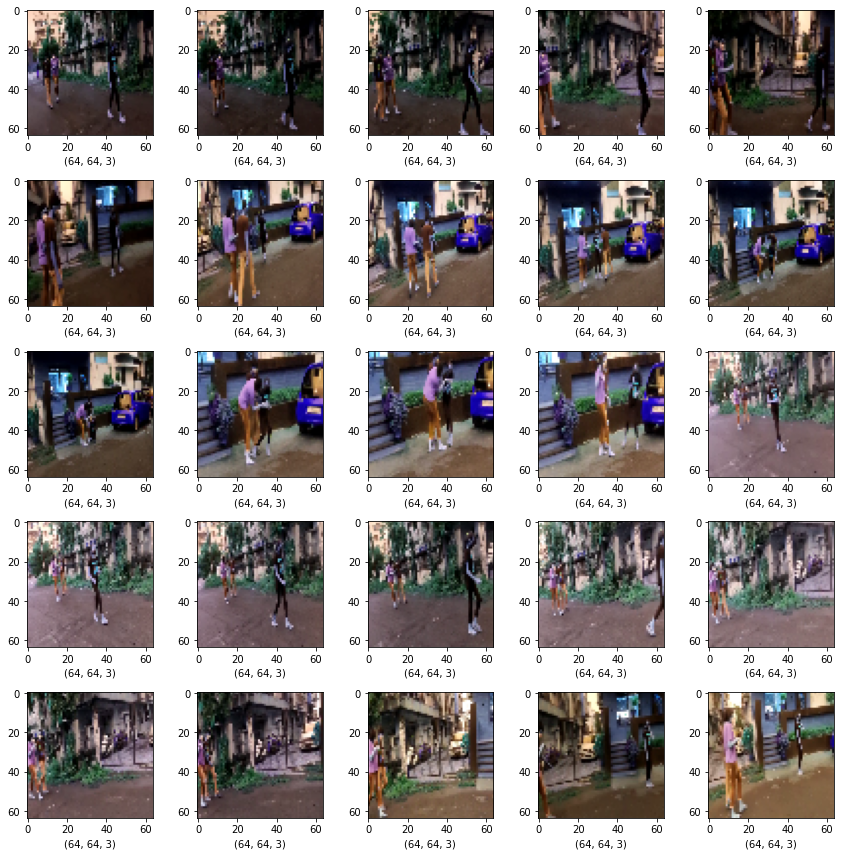

In [ ]:
figure,axis = plt.subplots(5,5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    
    Img_Pick = violence_frame_list[i]
    
    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [ ]:
X_4D_Violence = np.asarray(violence_frame_list)

In [ ]:
print(np.shape(X_4D_Violence))

(686, 64, 64, 3)


In [ ]:
X_4D_Violence_Labels = np.ones((686,1))

In [ ]:
print(np.shape(X_4D_Violence_Labels))

(686, 1)


In [ ]:
X_4D_Violence_Labels = X_4D_Violence_Labels.flatten()

In [ ]:
X_4D_Violence_Labels = X_4D_Violence_Labels.astype(int)

In [ ]:
print(X_4D_Violence_Labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

### Non-Violence Transformation

In [ ]:
print(Video_File_Path)

/content/drive/MyDrive/clips/Violence/WhatsApp Video 2021-10-10 at 00.38.35.mp4


In [ ]:
nonviolence_frame_list = []

for file_video in NonViolence_Data.MP4:
    Video_File_Path = file_video
    
    Video_Caption = cv2.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)
    
    while Video_Caption.isOpened():
        
        Current_Frame_ID = Video_Caption.get(1)
        
        ret,frame = Video_Caption.read()
        
        if ret != True:
            break
            
        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv2.resize(frame,(64,64))
            nonviolence_frame_list.append(Frame_Resize)
            
            
    Video_Caption.release()

In [ ]:
len(nonviolence_frame_list)

124

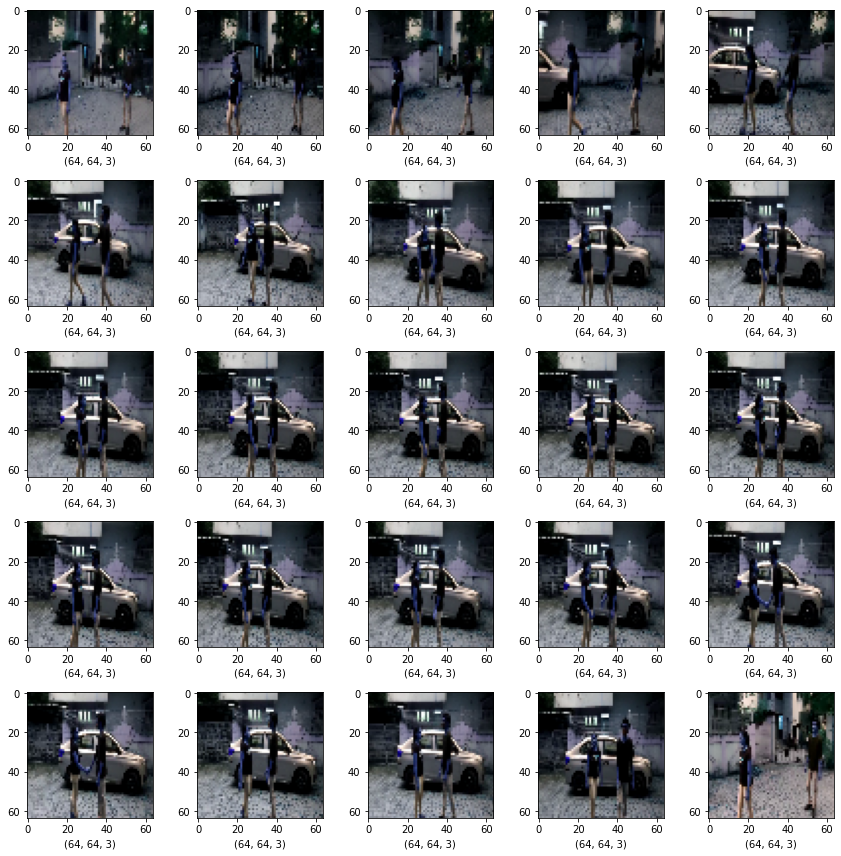

In [ ]:
figure,axis = plt.subplots(5,5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    
    Img_Pick = nonviolence_frame_list[i]
    
    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [ ]:
X_4D_NonViolence = np.asarray(nonviolence_frame_list)

In [ ]:
print(np.shape(X_4D_NonViolence))

(124, 64, 64, 3)


In [ ]:
X_4D_NonViolence_Labels = np.zeros((124,1))

In [ ]:
print(np.shape(X_4D_NonViolence_Labels))

(124, 1)


In [ ]:
X_4D_NonViolence_Labels = X_4D_NonViolence_Labels.flatten()

In [ ]:
X_4D_NonViolence_Labels = X_4D_NonViolence_Labels.astype(int)

In [ ]:
print(np.shape(X_4D_NonViolence_Labels))

(124,)


In [ ]:
print(X_4D_NonViolence_Labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Concatenating Violence and Non-Violence

In [ ]:
X_Train = np.concatenate((X_4D_Violence,X_4D_NonViolence),axis=0)

In [ ]:
print(np.shape(X_Train))

(810, 64, 64, 3)


In [ ]:
Y_Train = np.concatenate((X_4D_Violence_Labels,X_4D_NonViolence_Labels),axis=0)

In [ ]:
print(np.shape(Y_Train))

(810,)


In [ ]:
Target_X = X_Train
Label_X = Y_Train

In [ ]:
print(len(Target_X))
print(len(Label_X))

810
810


In [ ]:
y = []
for i in range(780):
  y.append(1)

In [ ]:
label_y = np.array(y)
print(label_y.shape)

(780,)


## Splitting in Train and Test

In [ ]:
xTrain,xTest,yTrain,yTest = train_test_split(Target_X,Label_X,train_size=0.9,random_state=42,shuffle=True)

In [ ]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(729, 64, 64, 3)
(729,)
(81, 64, 64, 3)
(81,)


## Building the CNN-LSTM Model

In [ ]:
Model = Sequential()

# Layer 1
Model.add(SeparableConv2D(12,(3,3),activation="relu",input_shape=(64,64,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

# Layer 2
Model.add(SeparableConv2D(24,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))


# Layer 3
Model.add(TimeDistributed(Flatten()))
Model.add(Bidirectional(LSTM(128,return_sequences=True,dropout=0.5,recurrent_dropout=0.5)))
Model.add(Bidirectional(LSTM(64,return_sequences=True,dropout=0.2)))

# Layer 4
Model.add(Flatten())
Model.add(Dense(128,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation="tanh"))

In [ ]:
print(Model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_2 (Separab  (None, 62, 62, 12)       75        
 leConv2D)                                                       
                                                                 
 batch_normalization_1 (Batc  (None, 62, 62, 12)       48        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 12)       0         
 2D)                                                             
                                                                 
 separable_conv2d_3 (Separab  (None, 31, 31, 24)       420       
 leConv2D)                                                       
                                                                 
 dropout_2 (Dropout)         (None, 31, 31, 24)       

In [ ]:
Callback_Stop_Early = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3)

In [ ]:
Model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

### Training the Model

In [ ]:
CNN_Model = Model.fit(xTrain,yTrain, validation_data=(xTest,yTest),callbacks=Callback_Stop_Early,epochs=20)

Epoch 1/20
23/23 [==============================] - 5s 225ms/step - loss: 0.0661 - accuracy: 0.9767 - val_loss: 0.2086 - val_accuracy: 0.9506
Epoch 2/20
23/23 [==============================] - 5s 226ms/step - loss: 0.0389 - accuracy: 0.9890 - val_loss: 0.2099 - val_accuracy: 0.9383
Epoch 3/20
23/23 [==============================] - 5s 225ms/step - loss: 0.0504 - accuracy: 0.9767 - val_loss: 0.2381 - val_accuracy: 0.9383
Epoch 4/20
23/23 [==============================] - 5s 227ms/step - loss: 0.0399 - accuracy: 0.9835 - val_loss: 0.1990 - val_accuracy: 0.9506
Epoch 5/20
23/23 [==============================] - 5s 225ms/step - loss: 0.0240 - accuracy: 0.9918 - val_loss: 0.2276 - val_accuracy: 0.9506
Epoch 6/20
23/23 [==============================] - 5s 227ms/step - loss: 0.0189 - accuracy: 0.9931 - val_loss: 0.2615 - val_accuracy: 0.9506
Epoch 7/20
23/23 [==============================] - 5s 226ms/step - loss: 0.0094 - accuracy: 0.9986 - val_loss: 0.3024 - val_accuracy: 0.9506
Epoch 

### Predicting 

In [ ]:
scores = Model.evaluate(xTest, yTest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.30%


In [ ]:
print(Model_Test_Prediction_Class.flatten())

In [ ]:
Model.save("/content/drive/MyDrive/clips/my_model.h5")

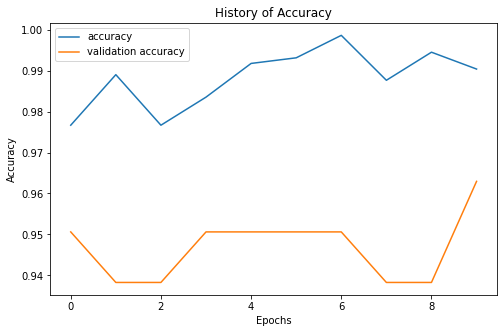

In [ ]:
fig, (ax1) = plt.subplots(figsize= (8,5))
plt.plot(CNN_Model.history['accuracy'])
plt.plot(CNN_Model.history['val_accuracy'])
ax1.set_title('History of Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(['accuracy', 'validation accuracy'])

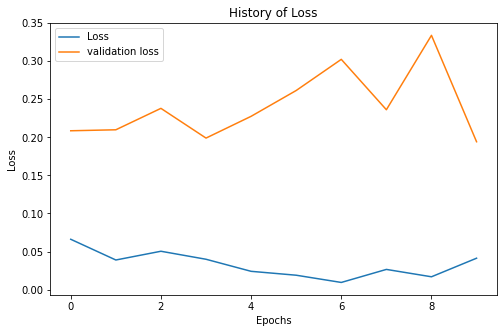

In [ ]:
fig, (ax1) = plt.subplots(figsize= (8,5))
plt.plot(CNN_Model.history['loss'])
plt.plot(CNN_Model.history['val_loss'])
ax1.set_title('History of Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(['Loss', 'validation loss'])

## Predicting a single video

In [ ]:
testing_video = []

Video_File_Path = '/content/drive/MyDrive/clips/Violence/20211002_163131.mp4'
    
Video_Caption = cv2.VideoCapture(Video_File_Path)
Frame_Rate = Video_Caption.get(5)
    
while Video_Caption.isOpened():
        
    Current_Frame_ID = Video_Caption.get(1)
        
    ret,frame = Video_Caption.read()
        
    if ret != True:
        break
            
    if Current_Frame_ID % math.floor(Frame_Rate) == 0:
        Frame_Resize = cv2.resize(frame,(64,64))
        testing_video.append(Frame_Resize)
            
            
Video_Caption.release()

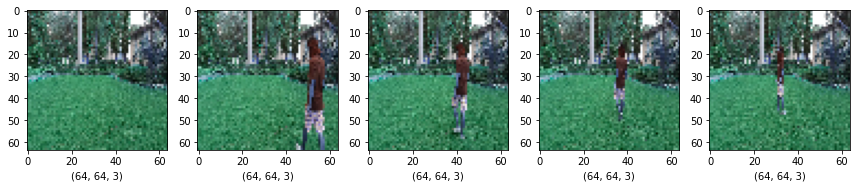

In [ ]:
figure,axis = plt.subplots(1,5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    
    Img_Pick = testing_video[i]
    
    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [ ]:
test = np.asarray(testing_video)

In [ ]:
Model_Test_Prediction = Model.predict(test)
print(np.argmax(Model_Test_Prediction))
# Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)
# print(Model_Test_Prediction)

0
